### 1. Import Libraries and Dataframe

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")


plt.style.use('fivethirtyeight') # This is a styling option for how plots will appear

In [2]:
path = r'C:\Users\kshifera\Desktop\CF_Course\Immersion\Achievement_6\WorldEnergyConsumptionAnalysis'

In [3]:
# import dataframe
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'T4.csv'), index_col = False)

In [4]:
# check
df.head()

,Unnamed: 0,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,...,wind_energy_per_capita,wind_share_elec,wind_share_energy,electrification_rate,fossils?,renewables?,nuclear?,continent,gdp_per_capita,income_group
0,0,Afghanistan,2000,AFG,19542986.0,1.128379e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,4.45,yes,yes,no,Asia,577.383256,low-income
1,1,Afghanistan,2001,AFG,19688634.0,1.102127e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,9.29,yes,yes,no,Asia,559.778453,low-income
2,2,Afghanistan,2002,AFG,21000258.0,1.880487e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,14.13,yes,yes,no,Asia,895.459054,low-income
3,3,Afghanistan,2003,AFG,22645136.0,2.107434e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,18.97,yes,yes,no,Asia,930.634461,low-income
4,4,Afghanistan,2004,AFG,23553554.0,2.233257e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,23.81,yes,yes,no,Asia,948.161439,low-income


In [5]:
# drop 'Unnamed: 0' column
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,wind_energy_per_capita,wind_share_elec,wind_share_energy,electrification_rate,fossils?,renewables?,nuclear?,continent,gdp_per_capita,income_group
0,Afghanistan,2000,AFG,19542986.0,1.128379e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,4.45,yes,yes,no,Asia,577.383256,low-income
1,Afghanistan,2001,AFG,19688634.0,1.102127e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,9.29,yes,yes,no,Asia,559.778453,low-income
2,Afghanistan,2002,AFG,21000258.0,1.880487e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,14.13,yes,yes,no,Asia,895.459054,low-income
3,Afghanistan,2003,AFG,22645136.0,2.107434e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,18.97,yes,yes,no,Asia,930.634461,low-income
4,Afghanistan,2004,AFG,23553554.0,2.233257e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,23.81,yes,yes,no,Asia,948.161439,low-income


In [6]:
df.shape

(3130, 136)

In [7]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'wind_energy_per_capita', 'wind_share_elec', 'wind_share_energy',
       'electrification_rate', 'fossils?', 'renewables?', 'nuclear?',
       'continent', 'gdp_per_capita', 'income_group'],
      dtype='object', length=136)

### 2. Subsetting

#### Dataframe contains records of 165 countries of the world for 19 years, between 2000 and 2018. For this exercise, we use a subset of this dataframe and analyse the greenhouse gas emissions from the electricity sector of China

In [9]:
# select only china
df2 = df.loc[(df['country'] == 'China')]

In [23]:
# select columns 'year' & 'greenhouse_gas_emissions' only
df3 = df2[['year', 'greenhouse_gas_emissions']]

In [24]:
df3.head(19)

,year,greenhouse_gas_emissions
551,2000,911.46
552,2001,969.74
553,2002,1097.06
554,2003,1295.21
555,2004,1471.59
556,2005,1676.44
557,2006,1938.99
558,2007,2229.51
559,2008,2271.10
560,2009,2444.37


In [25]:
df3.columns

Index(['year', 'greenhouse_gas_emissions'], dtype='object')

In [34]:
# set the 'year' column as index
df4=df3.set_index(['year'])
df4

,greenhouse_gas_emissions
year,
2000,911.46
2001,969.74
2002,1097.06
2003,1295.21
2004,1471.59
2005,1676.44
2006,1938.99
2007,2229.51
2008,2271.10


In [45]:
# convert the index to a datetime timestamp
df4.index = pd.to_datetime(df4.index, format='%Y')

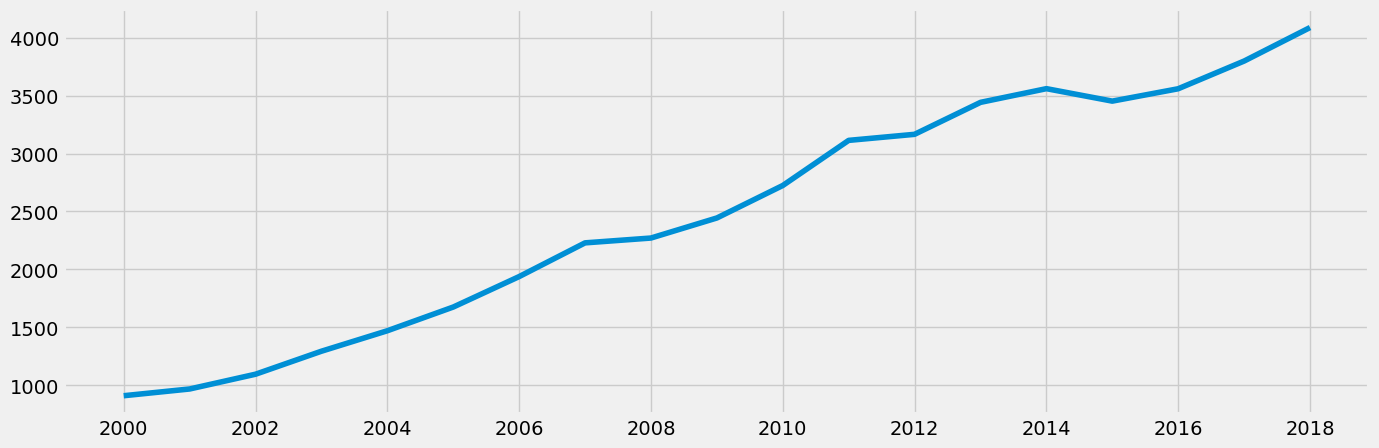

In [57]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df4)

In [47]:
# check for missing values
df4.isnull().sum()

greenhouse_gas_emissions    0
dtype: int64

In [48]:
# check for duplicates
dups = df4.duplicated()
dups.sum()

0

### 3. Time-series Analysis

In [50]:
# decomposition using the additive model
decomposition = sm.tsa.seasonal_decompose(df4,model='additive')

In [58]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

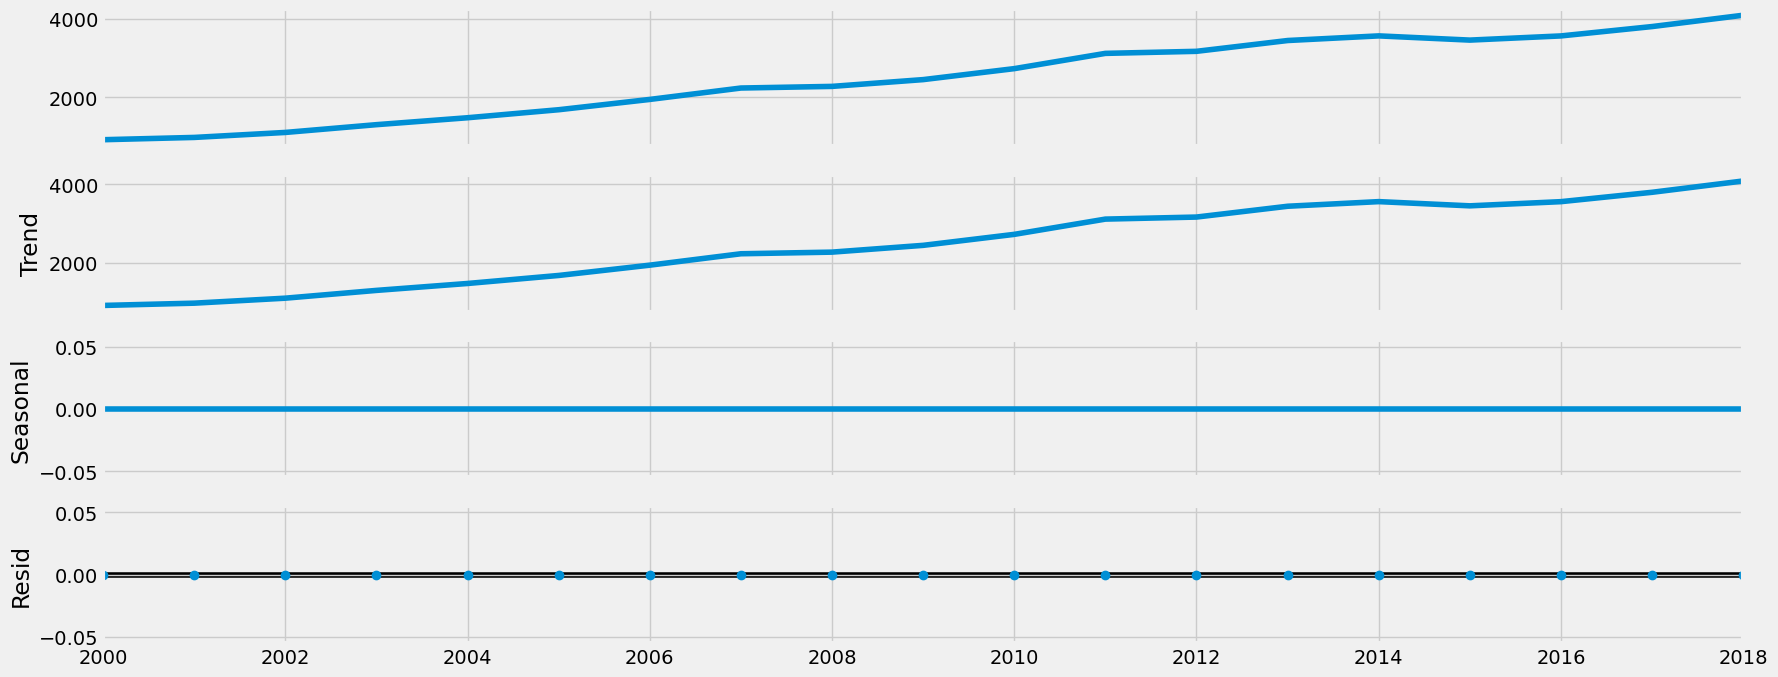

In [59]:
# Plot the separate components

decomposition.plot()
plt.show()

#### The data has no seasonality

### 4. Test for Stationarity

In [60]:
from statsmodels.tsa.stattools import adfuller # import the adfuller() function

def dickey_fuller(timeseries): # define the function
    # perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df4['greenhouse_gas_emissions'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.500169
p-value                         0.007983
Number of Lags Used             7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


#### At significance level of 5%, the test statistic with -3.500169 has a value less than the critical value which is -3.189369. Therefore, we can reject the null hypothesis.

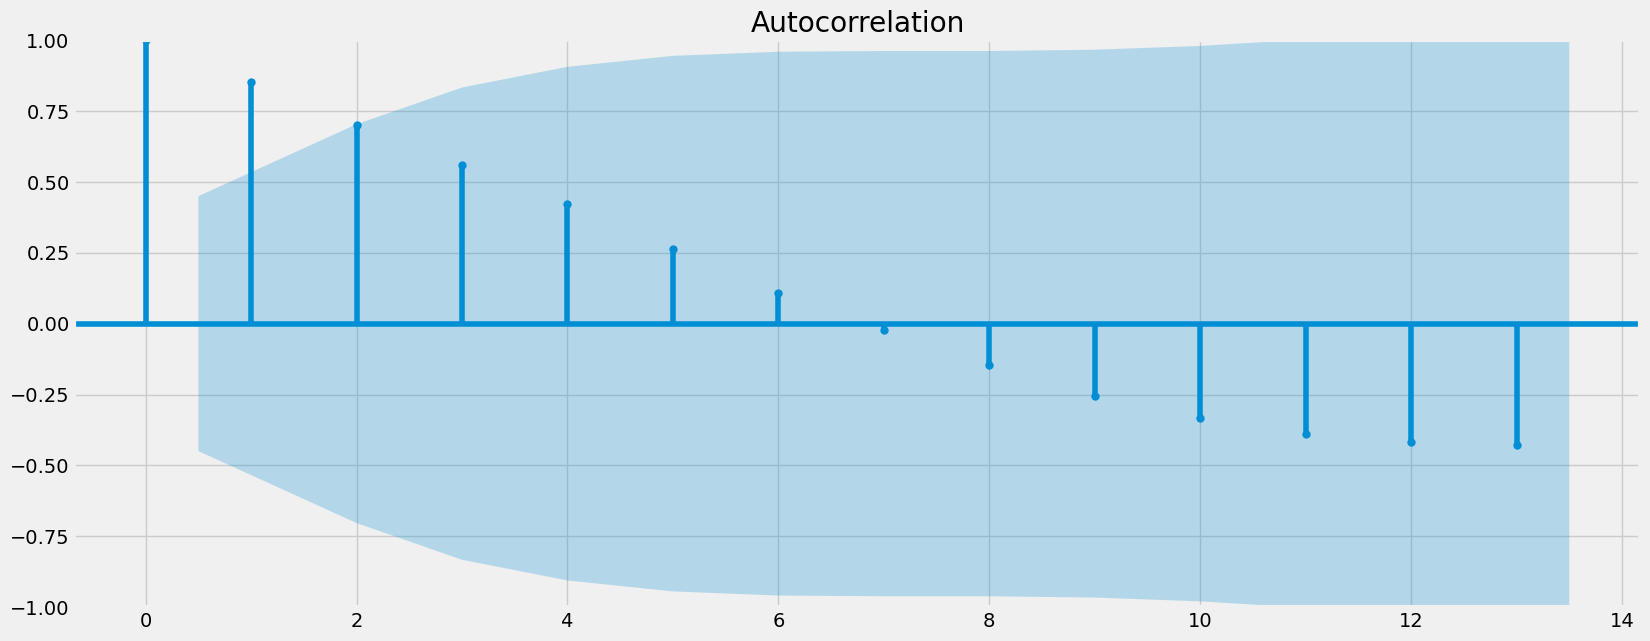

In [61]:
# check a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(df4)
plt.show()

#### With only two lines going above the blue edge of the confidence interval, we can deduce that our data has minimum autocorrelated data, which supports the result of the Dickey-Fuller test.

In [62]:
# Export
df4.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'T6_sub.csv'))